# Importing modules and data

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, make_scorer
from xgboost import XGBClassifier
import xgboost as xgb
from xgboost import plot_importance
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import permutation_importance
import time

In [2]:
train_set_ind = pd.read_csv("../Downloads/train_set_ind.csv")
test_set_ind = pd.read_csv("../Downloads/test_set_ind.csv")
train_set_val = pd.read_csv("../Downloads/train_set_val.csv")
test_set_val = pd.read_csv("../Downloads/test_set_val.csv")

subset_013_ind = pd.read_csv("../Downloads/subset1_ind.csv")
subset_03_ind = pd.read_csv("../Downloads/subset2_ind.csv")
subset_3_ind = pd.read_csv("../Downloads/subset3_ind.csv")
subset_013_val = pd.read_csv("../Downloads/subset1_val.csv")
subset_03_val = pd.read_csv("../Downloads/subset2_val.csv")
subset_3_val = pd.read_csv("../Downloads/subset3_val.csv")

In [3]:
train_set_ind = train_set_ind.drop(['Unnamed: 0'], axis=1)
test_set_ind = test_set_ind.drop(['Unnamed: 0'], axis=1)
train_set_val = train_set_val.drop(['Unnamed: 0'], axis=1)
test_set_val = test_set_val.drop(['Unnamed: 0'], axis=1)

subset_013_ind = subset_013_ind.drop(['Unnamed: 0'], axis=1)
subset_03_ind = subset_03_ind.drop(['Unnamed: 0'], axis=1)
subset_3_ind = subset_3_ind.drop(['Unnamed: 0'], axis=1)
subset_013_val = subset_013_val.drop(['Unnamed: 0'], axis=1)
subset_03_val = subset_03_val.drop(['Unnamed: 0'], axis=1)
subset_3_val = subset_3_val.drop(['Unnamed: 0'], axis=1)

# Transform back to categorical

In [4]:
category_columns = ['sex', 'income', 'entrepreneur_freelancer', 
                     'entrepreneur_freelancer_alongside', 'one_person_business', 'income', 
                     'company_owner', 'partnership', 'partner_partnership', 
                     'private_limited_liability_company', 'other', 'none_work_situation', 
                     'early_retirement', 'zorgtoeslag', 'Ziektewetuitkering', 
                     'ANW', 'nabestaandenpensioen', 'orphan_pension', 'bijstand', 
                     'bijstand_zelfstandigen', 'IOAWIOAZ', 'WGA', 'invadility_pension', 
                     'kinderbijslag', 'none_benefit', 'income_realestate', 'student_grant', 
                     'student_loan', 'alimony_ex', 'alimony_children', 'study_allowance_parents', 
                     'allowence_family', 'dividend_stock_investment', 'interests', 
                     'none_sources', 'interest_loans', 'alimony_ex_paid', 'alimony_children_paid',
                     'parental_support_paid', 'parental_support_paid_other', 'support_gift_paid', 
                     'big_purchase', 'no_arrears', 'rent_mortgage_arrears',  
                     'general_utilities_arrear', 'other_arrears', 'months_arrears_rent', 
                     'months_arrears_general_utilities', 'partyvote', 'age_2', 'satisfaction_individual_2', 
                     'satisfaction_national_2', 'income_2', 
                     'gross_wages_amount_2', 'entrepreneur_freelancer_2', 
                     'entrepreneur_freelancer_alongside_2', 'one_person_business_2', 
                     'company_owner_2', 'partnership_2', 'partner_partnership_2', 
                     'private_limited_liability_company_2', 'other_2', 'none_work_situation_2', 
                     'zorgtoeslag_2', 'Ziektewetuitkering_2', 
                     'ANW_2', 'nabestaandenpensioen_2', 'bijstand_2', 
                     'bijstand_zelfstandigen_2', 'IOAWIOAZ_2', 'WGA_2', 'invadility_pension_2', 
                     'kinderbijslag_2', 'none_benefit_2', 'income_realestate_2', 'realestate_amount_2', 'student_grant_2', 
                     'amount_student_grant_2', 'student_loan_2', 'amount_student_loan_2', 'alimony_ex_2', 
                     'amount_alimony_ex_2', 
                     'alimony_children_2', 'amount_alimony_children_2', 'study_allowance_parents_2', 
                     'amount_study_allowance_parents_2', 
                     'allowence_family_2', 'amount_allowance_family_2', 'dividend_stock_investment_2', 
                     'amount_dividend_stock_investment_2',
                     'interests_2', 'amount_interests_2', 
                     'none_sources_2', 'interest_loans_2', 'amount_interest_loans_2', 'parental_support_paid_other_2', 
                     'support_gift_paid_2', 'amount_support_gift_paid_2',
                     'taxable_income_2', 'net_income_household_2', 'financial_situation_grade_2', 
                     'difficulty_life_grade_2', 'financial_situation_category_2', 'household_expenditure_2', 
                     'big_purchase_2', 'financial_situation_future_2', 'no_arrears_2', 
                     'rent_mortgage_arrears_2', 'amount_rent_mortgage_arrears_2', 'general_utilities_arrear_2', 
                     'amount_general_utilities_arrear_2',  
                     'other_arrears_2', 'amount_other_arrears_2', 'months_arrears_rent_2', 
                     'months_arrears_general_utilities_2']

In [5]:
for col in train_set_ind.columns:
    for i in category_columns:
        if col == i:
            train_set_ind[col] = train_set_ind[col].astype('category')

In [6]:
for col in test_set_ind.columns:
    for i in category_columns:
        if col == i:
            test_set_ind[col] = test_set_ind[col].astype('category')

In [7]:
for col in train_set_val.columns:
    for i in category_columns:
        if col == i:
            train_set_val[col] = train_set_val[col].astype('category')

In [8]:
for col in test_set_val.columns:
    for i in category_columns:
        if col == i:
            test_set_val[col] = test_set_val[col].astype('category')

In [9]:
for col in subset_013_ind.columns:
    for i in category_columns:
        if col == i:
            subset_013_ind[col] = subset_013_ind[col].astype('category')

In [10]:
for col in subset_03_ind.columns:
    for i in category_columns:
        if col == i:
            subset_03_ind[col] = subset_03_ind[col].astype('category')

In [11]:
for col in subset_3_ind.columns:
    for i in category_columns:
        if col == i:
            subset_3_ind[col] = subset_3_ind[col].astype('category')

In [12]:
for col in subset_013_val.columns:
    for i in category_columns:
        if col == i:
            subset_013_val[col] = subset_013_val[col].astype('category')

In [13]:
for col in subset_03_val.columns:
    for i in category_columns:
        if col == i:
            subset_03_val[col] = subset_03_val[col].astype('category')

In [14]:
for col in subset_3_val.columns:
    for i in category_columns:
        if col == i:
            subset_3_val[col] = subset_3_val[col].astype('category')

__label encode target variable to suit XGBoost model__

In [15]:
train_set_ind['partyvote'].value_counts()

VVD      3068
PvdA     2791
CDA      2361
SP       1873
PVV      1279
D66      1221
GL        979
CU        584
other     418
PvdD      300
SGP       266
blank      60
Name: partyvote, dtype: int64

In [16]:
test_set_ind['partyvote'].value_counts()

VVD      781
D66      582
other    487
CDA      379
PvdA     327
PVV      301
SP       260
GL       219
PvdD     172
CU       140
SGP       56
blank     13
Name: partyvote, dtype: int64

In [17]:
train_set_ind['partyvote'] = train_set_ind['partyvote'].replace(['VVD', 'PvdA', 'CDA','SP','PVV','D66','GL','CU','other','PvdD','SGP','blank'], 
                                          [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

In [18]:
test_set_ind['partyvote'] = test_set_ind['partyvote'].replace(['VVD', 'PvdA', 'CDA','SP','PVV','D66','GL','CU','other','PvdD','SGP','blank'], 
                                          [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

In [19]:
train_set_val['partyvote'] = train_set_val['partyvote'].replace(['VVD', 'PvdA', 'CDA','SP','PVV','D66','GL','CU','other','PvdD','SGP','blank'], 
                                          [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

In [20]:
test_set_val['partyvote'] = test_set_val['partyvote'].replace(['VVD', 'PvdA', 'CDA','SP','PVV','D66','GL','CU','other','PvdD','SGP','blank'], 
                                          [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

In [21]:
subset_013_ind['partyvote'] = subset_013_ind['partyvote'].replace(['VVD', 'PvdA', 'CDA','SP','PVV','D66','GL','CU','other','PvdD','SGP','blank'], 
                                          [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

In [22]:
subset_03_ind['partyvote'] = subset_03_ind['partyvote'].replace(['VVD', 'PvdA', 'CDA','SP','PVV','D66','GL','CU','other','PvdD','SGP','blank'], 
                                          [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

In [23]:
subset_3_ind['partyvote'] = subset_3_ind['partyvote'].replace(['VVD', 'PvdA', 'CDA','SP','PVV','D66','GL','CU','other','PvdD','SGP','blank'], 
                                          [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

In [24]:
subset_013_val['partyvote'] = subset_013_val['partyvote'].replace(['VVD', 'PvdA', 'CDA','SP','PVV','D66','GL','CU','other','PvdD','SGP','blank'], 
                                          [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

In [25]:
subset_03_val['partyvote'] = subset_03_val['partyvote'].replace(['VVD', 'PvdA', 'CDA','SP','PVV','D66','GL','CU','other','PvdD','SGP','blank'], 
                                          [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

In [26]:
subset_3_val['partyvote'] = subset_3_val['partyvote'].replace(['VVD', 'PvdA', 'CDA','SP','PVV','D66','GL','CU','other','PvdD','SGP','blank'], 
                                          [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

__Splitting into dependent and independent variables__

In [27]:
train_set_val

,date,sex,age,satisfaction_individual,satisfaction_individual_2,satisfaction_national,satisfaction_national_2,income,income_2,entrepreneur_freelancer,...,other_arrears,other_arrears_2,months_arrears_rent,months_arrears_rent_2,months_arrears_general_utilities,months_arrears_general_utilities_2,GDP,inflation,unemployment,partyvote
0,201906.0,1.0,63.0,7,3.0,7,3.0,0.0,3.0,0.0,...,0.0,3.0,0.0,3.0,0.0,3.0,1.000000,0.456731,0.30,2
1,201906.0,1.0,56.0,7,3.0,8,3.0,1.0,3.0,0.0,...,0.0,3.0,0.0,3.0,0.0,3.0,1.000000,0.456731,0.30,3
2,201906.0,0.0,43.0,8,3.0,6,3.0,1.0,3.0,0.0,...,0.0,3.0,0.0,3.0,0.0,3.0,1.000000,0.456731,0.30,6
3,201906.0,0.0,72.0,3,3.0,5,3.0,0.0,3.0,0.0,...,0.0,3.0,0.0,3.0,0.0,3.0,1.000000,0.456731,0.30,0
4,201907.0,1.0,44.0,8,3.0,8,3.0,1.0,3.0,0.0,...,0.0,3.0,0.0,3.0,0.0,3.0,1.000000,0.456731,0.30,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15195,200806.0,0.0,44.0,7,3.0,7,3.0,1.0,3.0,0.0,...,0.0,3.0,0.0,3.0,0.0,3.0,0.918586,0.519231,0.75,3
15196,200806.0,1.0,57.0,7,3.0,6,3.0,1.0,3.0,0.0,...,0.0,3.0,0.0,3.0,0.0,3.0,0.918586,0.519231,0.75,2
15197,200806.0,1.0,45.0,7,3.0,5,3.0,1.0,3.0,0.0,...,0.0,3.0,0.0,3.0,0.0,3.0,0.918586,0.519231,0.75,3
15198,200806.0,0.0,48.0,6,3.0,5,3.0,1.0,3.0,1.0,...,1.0,3.0,0.0,3.0,0.0,3.0,0.918586,0.519231,0.75,3


_Individual:_

In [28]:
X_train_ind = train_set_ind.iloc[:, :-1].values
X_test_ind = test_set_ind.iloc[:, :-1].values
y_train_ind = train_set_ind.iloc[:,-1].values
y_test_ind = test_set_ind.iloc[:,-1].values

_Valence:_

In [29]:
X_train_val= train_set_val.iloc[:, :-1].values
X_test_val = test_set_val.iloc[:, :-1].values
y_train_val = train_set_val.iloc[:,-1].values
y_test_val = test_set_val.iloc[:,-1].values

_For smaller but more complete dataframes:_

In [30]:
X_subset_013_ind = subset_013_ind.iloc[:, :-1].values
y_subset_013_ind = subset_013_ind.iloc[:,-1].values
X_subset_013_val = subset_013_val.iloc[:, :-1].values
y_subset_013_val = subset_013_val.iloc[:,-1].values

In [31]:
X_subset_03_ind = subset_013_ind.iloc[:, :-1].values
y_subset_03_ind = subset_013_ind.iloc[:,-1].values
X_subset_03_val = subset_013_val.iloc[:, :-1].values
y_subset_03_val = subset_013_val.iloc[:,-1].values

In [32]:
X_subset_3_ind = subset_013_ind.iloc[:, :-1].values
y_subset_3_ind = subset_013_ind.iloc[:,-1].values
X_subset_3_val = subset_013_val.iloc[:, :-1].values
y_subset_3_val = subset_013_val.iloc[:,-1].values

&nbsp;

# XGBoost

In [33]:
def plot(y_true, y_pred):
    labels = unique_labels(y_true)
    column = [f'Predicted {label}' for label in labels]
    indices = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred),
                        columns=column, index=indices)
    return table

In [34]:
def feature_importances(model, num):
    plt.figure(figsize=(18,18))
    plot_importance(model,max_num_features=num)
    plt.rcParams["figure.figsize"] = (10,10)
    plt.show()

&nbsp;

### All datapoints:

__Individual__

In [35]:
np.random.seed(1908)
xgb1_ind = XGBClassifier(max_depth=2, eta=0.01)
xgb2_ind = XGBClassifier(max_depth=2, eta=1)
xgb3_ind = XGBClassifier(max_depth=10, eta=0.01)
xgb4_ind = XGBClassifier(max_depth=10, eta=1) # best performance

In [36]:
np.random.seed(1908)
xgb1_ind.fit(X_train_ind,y_train_ind) 
xgb2_ind.fit(X_train_ind,y_train_ind) 
xgb3_ind.fit(X_train_ind,y_train_ind) 
xgb4_ind.fit(X_train_ind,y_train_ind) # best performance

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False, eta=1,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=10, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', ...)

In [37]:
pred_ind_1 = xgb1_ind.predict(X_test_ind)
pred_ind_2 = xgb2_ind.predict(X_test_ind)
pred_ind_3 = xgb3_ind.predict(X_test_ind) 
pred_ind_4 = xgb4_ind.predict(X_test_ind)# best performance

In [38]:
print(classification_report(y_test_ind, pred_ind_1, zero_division=1))

              precision    recall  f1-score   support

           0       0.22      0.96      0.36       781
           1       1.00      0.00      0.00       327
           2       0.17      0.03      0.05       379
           3       0.08      0.01      0.02       260
           4       0.17      0.08      0.11       301
           5       0.17      0.01      0.02       582
           6       1.00      0.00      0.00       219
           7       1.00      0.00      0.00       140
           8       1.00      0.00      0.00       487
           9       1.00      0.00      0.00       172
          10       1.00      0.00      0.00        56
          11       1.00      0.00      0.00        13

    accuracy                           0.21      3717
   macro avg       0.65      0.09      0.05      3717
weighted avg       0.49      0.21      0.09      3717



In [39]:
print(classification_report(y_test_ind, pred_ind_2, zero_division=1))

              precision    recall  f1-score   support

           0       0.23      0.16      0.19       781
           1       0.11      0.04      0.06       327
           2       0.12      0.08      0.10       379
           3       0.09      0.37      0.15       260
           4       0.16      0.16      0.16       301
           5       0.21      0.30      0.25       582
           6       0.00      0.00      0.00       219
           7       1.00      0.00      0.00       140
           8       0.17      0.16      0.16       487
           9       0.00      0.00      0.00       172
          10       0.01      0.02      0.01        56
          11       1.00      0.00      0.00        13

    accuracy                           0.15      3717
   macro avg       0.26      0.11      0.09      3717
weighted avg       0.19      0.15      0.14      3717



In [40]:
print(classification_report(y_test_ind, pred_ind_3, zero_division=1))

              precision    recall  f1-score   support

           0       0.24      0.61      0.34       781
           1       0.12      0.05      0.07       327
           2       0.14      0.02      0.03       379
           3       0.05      0.01      0.01       260
           4       0.20      0.17      0.18       301
           5       0.16      0.27      0.20       582
           6       0.11      0.06      0.08       219
           7       0.00      0.00      0.00       140
           8       0.12      0.02      0.04       487
           9       0.11      0.01      0.02       172
          10       0.17      0.02      0.03        56
          11       0.00      0.00      0.00        13

    accuracy                           0.20      3717
   macro avg       0.12      0.10      0.08      3717
weighted avg       0.15      0.20      0.14      3717



In [41]:
print(classification_report(y_test_ind, pred_ind_4, zero_division=1)) # best performance

              precision    recall  f1-score   support

           0       0.26      0.41      0.32       781
           1       0.11      0.12      0.12       327
           2       0.08      0.06      0.07       379
           3       0.13      0.09      0.11       260
           4       0.12      0.19      0.15       301
           5       0.20      0.22      0.21       582
           6       0.03      0.00      0.01       219
           7       0.17      0.01      0.01       140
           8       0.19      0.16      0.17       487
           9       0.04      0.01      0.02       172
          10       0.00      0.00      0.00        56
          11       1.00      0.00      0.00        13

    accuracy                           0.18      3717
   macro avg       0.19      0.11      0.10      3717
weighted avg       0.16      0.18      0.16      3717



<Figure size 1800x1800 with 0 Axes>

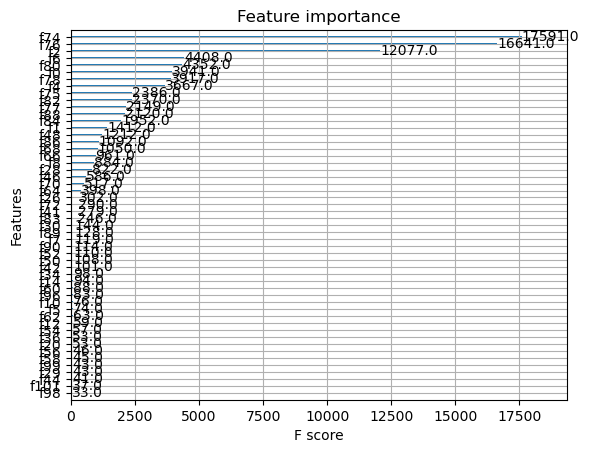

In [42]:
feature_importances(xgb4_ind, 52)

&nbsp;

__Valence__

In [43]:
np.random.seed(1909)
xgb1_val = XGBClassifier(max_depth=2, eta=0.01)
xgb2_val = XGBClassifier(max_depth=2, eta=1)
xgb3_val = XGBClassifier(max_depth=10, eta=0.01) # best performance
xgb4_val = XGBClassifier(max_depth=10, eta=1)

In [44]:
np.random.seed(1909)
xgb1_val.fit(X_train_val,y_train_val) 
xgb2_val.fit(X_train_val,y_train_val) 
xgb3_val.fit(X_train_val,y_train_val) # best performance
xgb4_val.fit(X_train_val,y_train_val) 

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False, eta=1,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=10, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', ...)

In [45]:
pred_val_1 = xgb1_val.predict(X_test_val)
pred_val_2 = xgb2_val.predict(X_test_val)
pred_val_3 = xgb3_val.predict(X_test_val) # best performance
pred_val_4 = xgb4_val.predict(X_test_val)

In [46]:
print(classification_report(y_test_val, pred_val_1, zero_division=1))

              precision    recall  f1-score   support

           0       0.21      0.98      0.35       781
           1       1.00      0.00      0.00       327
           2       0.12      0.02      0.03       379
           3       0.00      0.00      0.00       260
           4       0.19      0.03      0.05       301
           5       0.10      0.00      0.01       582
           6       1.00      0.00      0.00       219
           7       1.00      0.00      0.00       140
           8       1.00      0.00      0.00       487
           9       1.00      0.00      0.00       172
          10       1.00      0.00      0.00        56
          11       1.00      0.00      0.00        13

    accuracy                           0.21      3717
   macro avg       0.64      0.09      0.04      3717
weighted avg       0.47      0.21      0.08      3717



In [47]:
print(classification_report(y_test_val, pred_val_2, zero_division=1))

              precision    recall  f1-score   support

           0       0.23      0.65      0.34       781
           1       0.27      0.01      0.02       327
           2       0.12      0.27      0.16       379
           3       0.05      0.03      0.04       260
           4       0.13      0.08      0.10       301
           5       0.21      0.03      0.05       582
           6       0.12      0.00      0.01       219
           7       0.00      0.00      0.00       140
           8       0.13      0.04      0.06       487
           9       1.00      0.00      0.00       172
          10       1.00      0.00      0.00        56
          11       1.00      0.00      0.00        13

    accuracy                           0.18      3717
   macro avg       0.36      0.09      0.07      3717
weighted avg       0.22      0.18      0.12      3717



In [48]:
print(classification_report(y_test_val, pred_val_3, zero_division=1)) # best performance

              precision    recall  f1-score   support

           0       0.23      0.62      0.33       781
           1       0.22      0.13      0.16       327
           2       0.12      0.20      0.15       379
           3       0.14      0.05      0.07       260
           4       0.12      0.04      0.06       301
           5       0.24      0.09      0.13       582
           6       0.07      0.00      0.01       219
           7       0.00      0.00      0.00       140
           8       0.13      0.06      0.08       487
           9       0.07      0.05      0.06       172
          10       0.00      0.00      0.00        56
          11       1.00      0.00      0.00        13

    accuracy                           0.19      3717
   macro avg       0.19      0.10      0.09      3717
weighted avg       0.16      0.19      0.14      3717



<Figure size 1800x1800 with 0 Axes>

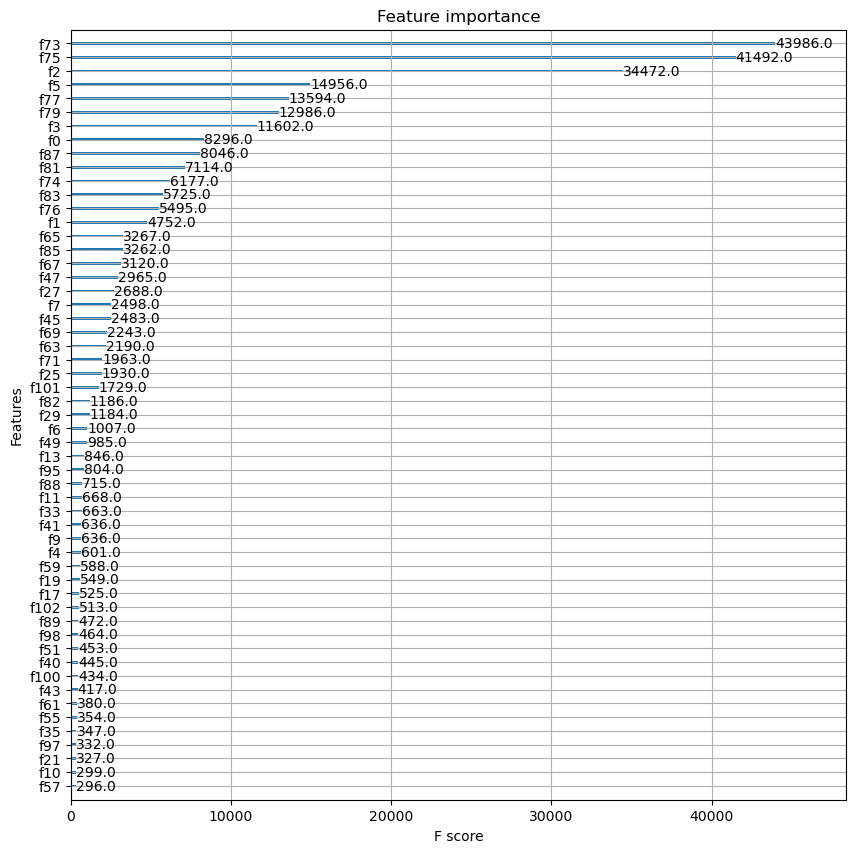

In [49]:
feature_importances(xgb3_val, 55)

In [50]:
print(classification_report(y_test_val, pred_val_4, zero_division=1))

              precision    recall  f1-score   support

           0       0.22      0.82      0.34       781
           1       0.18      0.03      0.06       327
           2       0.15      0.11      0.12       379
           3       0.08      0.01      0.02       260
           4       0.14      0.03      0.05       301
           5       0.21      0.08      0.11       582
           6       0.00      0.00      0.00       219
           7       0.00      0.00      0.00       140
           8       0.10      0.02      0.03       487
           9       0.14      0.01      0.01       172
          10       1.00      0.00      0.00        56
          11       1.00      0.00      0.00        13

    accuracy                           0.20      3717
   macro avg       0.27      0.09      0.06      3717
weighted avg       0.16      0.20      0.12      3717



&nbsp;

&nbsp;

### Datapoints excluding "I prefer not to say" answers:

__Individual__

In [51]:
np.random.seed(1908)
xgb4_ind.fit(X_subset_013_ind,y_subset_013_ind)
pred_ind2 = xgb4_ind.predict(X_test_ind)

In [52]:
plot(y_test_ind, pred_ind2)

,Predicted 0,Predicted 1,Predicted 2,Predicted 3,Predicted 4,Predicted 5,Predicted 6,Predicted 7,Predicted 8,Predicted 9,Predicted 10,Predicted 11
Actual 0,328,36,79,34,72,194,5,0,20,5,6,2
Actual 1,93,26,34,29,51,74,3,0,12,3,2,0
Actual 2,123,20,34,31,55,85,7,0,18,4,2,0
Actual 3,65,15,17,23,62,64,0,0,12,1,1,0
Actual 4,101,11,14,17,77,53,2,0,24,2,0,0
Actual 5,210,34,49,30,60,165,2,0,18,8,6,0
Actual 6,70,11,21,14,35,59,0,0,4,0,5,0
Actual 7,52,10,9,9,20,33,2,1,3,1,0,0
Actual 8,190,17,26,19,75,118,2,0,33,1,6,0
Actual 9,57,9,14,8,23,48,0,0,10,1,1,1


In [53]:
print(classification_report(y_test_ind, pred_ind2, zero_division=1))

              precision    recall  f1-score   support

           0       0.25      0.42      0.31       781
           1       0.14      0.08      0.10       327
           2       0.11      0.09      0.10       379
           3       0.11      0.09      0.10       260
           4       0.14      0.26      0.18       301
           5       0.18      0.28      0.22       582
           6       0.00      0.00      0.00       219
           7       1.00      0.01      0.01       140
           8       0.21      0.07      0.10       487
           9       0.04      0.01      0.01       172
          10       0.00      0.00      0.00        56
          11       0.00      0.00      0.00        13

    accuracy                           0.19      3717
   macro avg       0.18      0.11      0.10      3717
weighted avg       0.19      0.19      0.16      3717



<Figure size 1800x1800 with 0 Axes>

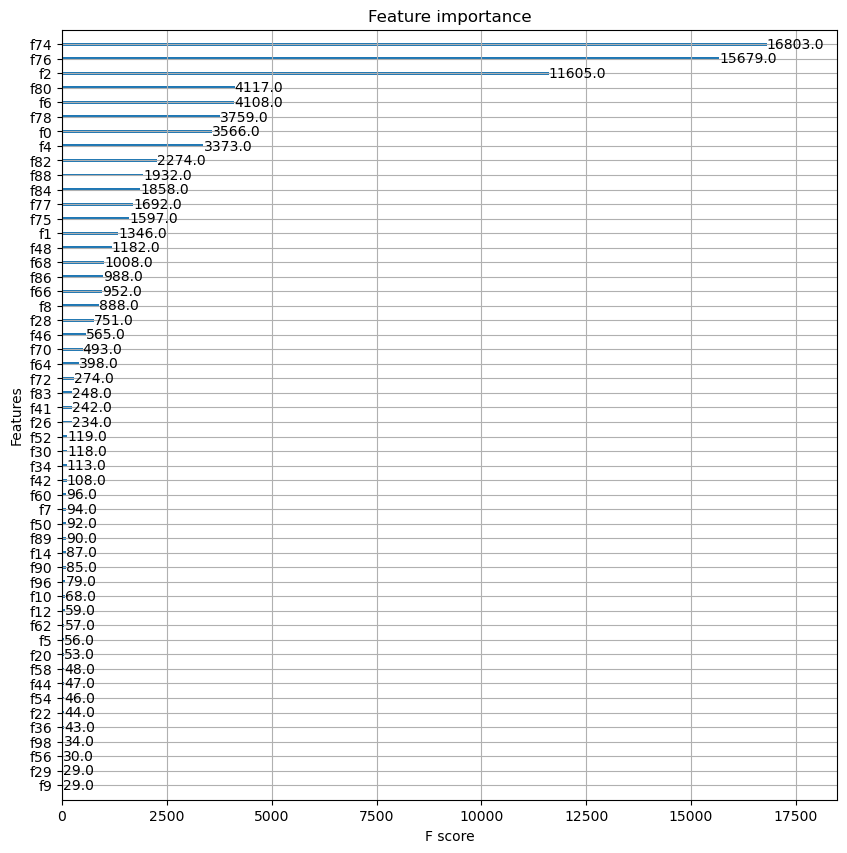

In [54]:
feature_importances(xgb4_ind, 52)

&nbsp;

__Valence__

In [55]:
np.random.seed(1909)
xgb3_val.fit(X_subset_013_val,y_subset_013_val)
pred_val2 = xgb3_val.predict(X_test_val)

In [56]:
plot(y_test_val, pred_val2)

,Predicted 0,Predicted 1,Predicted 2,Predicted 3,Predicted 4,Predicted 5,Predicted 6,Predicted 7,Predicted 8,Predicted 9,Predicted 10,Predicted 11
Actual 0,485,55,110,3,15,64,7,0,35,7,0,0
Actual 1,181,46,34,1,13,30,0,0,22,0,0,0
Actual 2,221,32,56,0,10,24,1,0,33,2,0,0
Actual 3,152,12,37,0,11,20,0,0,25,2,1,0
Actual 4,184,9,30,3,27,28,0,0,19,1,0,0
Actual 5,296,30,110,2,21,79,2,0,37,5,0,0
Actual 6,125,13,30,2,3,36,1,1,7,1,0,0
Actual 7,92,7,19,0,5,7,1,0,9,0,0,0
Actual 8,271,9,47,10,22,76,2,1,40,9,0,0
Actual 9,96,7,29,2,8,24,0,0,6,0,0,0


In [57]:
print(classification_report(y_test_val, pred_val2, zero_division=1))

              precision    recall  f1-score   support

           0       0.23      0.62      0.33       781
           1       0.20      0.14      0.17       327
           2       0.11      0.15      0.13       379
           3       0.00      0.00      0.00       260
           4       0.20      0.09      0.12       301
           5       0.20      0.14      0.16       582
           6       0.07      0.00      0.01       219
           7       0.00      0.00      0.00       140
           8       0.17      0.08      0.11       487
           9       0.00      0.00      0.00       172
          10       0.00      0.00      0.00        56
          11       1.00      0.00      0.00        13

    accuracy                           0.20      3717
   macro avg       0.18      0.10      0.09      3717
weighted avg       0.15      0.20      0.15      3717



<Figure size 1800x1800 with 0 Axes>

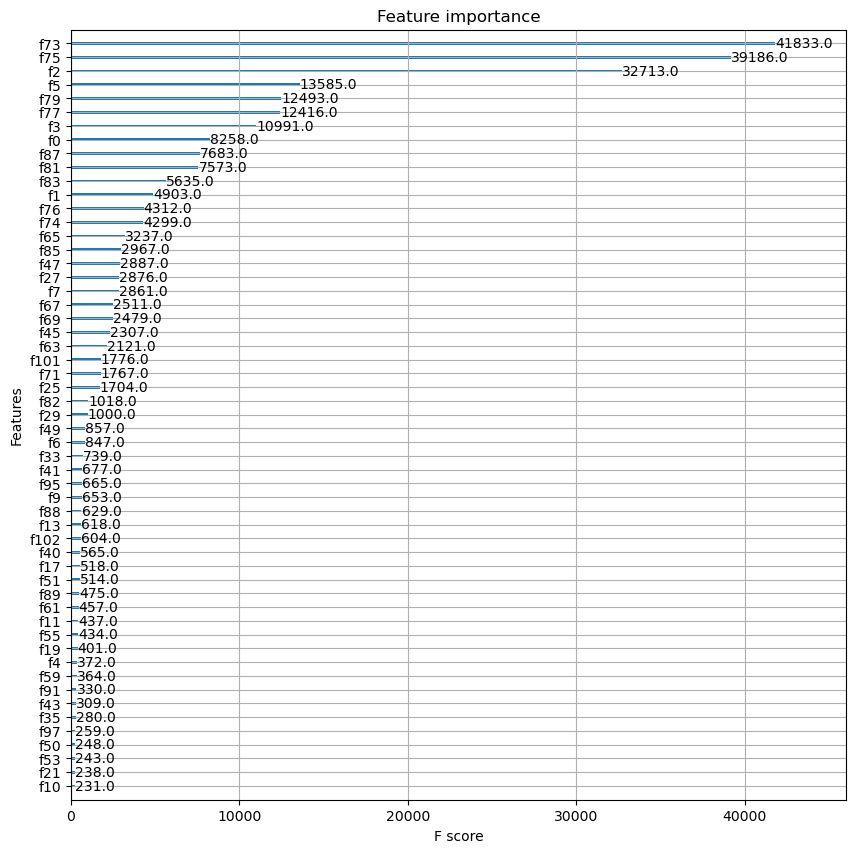

In [58]:
feature_importances(xgb3_val, 55)

&nbsp;

&nbsp;

### Datapoints excluding "I prefer not to say" & "I don't know" answers:

__Individual__

In [59]:
np.random.seed(1908)
xgb4_ind.fit(X_subset_03_ind,y_subset_03_ind)
pred_ind3 = xgb4_ind.predict(X_test_ind)

In [60]:
plot(y_test_ind, pred_ind3)

,Predicted 0,Predicted 1,Predicted 2,Predicted 3,Predicted 4,Predicted 5,Predicted 6,Predicted 7,Predicted 8,Predicted 9,Predicted 10,Predicted 11
Actual 0,328,36,79,34,72,194,5,0,20,5,6,2
Actual 1,93,26,34,29,51,74,3,0,12,3,2,0
Actual 2,123,20,34,31,55,85,7,0,18,4,2,0
Actual 3,65,15,17,23,62,64,0,0,12,1,1,0
Actual 4,101,11,14,17,77,53,2,0,24,2,0,0
Actual 5,210,34,49,30,60,165,2,0,18,8,6,0
Actual 6,70,11,21,14,35,59,0,0,4,0,5,0
Actual 7,52,10,9,9,20,33,2,1,3,1,0,0
Actual 8,190,17,26,19,75,118,2,0,33,1,6,0
Actual 9,57,9,14,8,23,48,0,0,10,1,1,1


In [61]:
print(classification_report(y_test_ind, pred_ind3, zero_division=1))

              precision    recall  f1-score   support

           0       0.25      0.42      0.31       781
           1       0.14      0.08      0.10       327
           2       0.11      0.09      0.10       379
           3       0.11      0.09      0.10       260
           4       0.14      0.26      0.18       301
           5       0.18      0.28      0.22       582
           6       0.00      0.00      0.00       219
           7       1.00      0.01      0.01       140
           8       0.21      0.07      0.10       487
           9       0.04      0.01      0.01       172
          10       0.00      0.00      0.00        56
          11       0.00      0.00      0.00        13

    accuracy                           0.19      3717
   macro avg       0.18      0.11      0.10      3717
weighted avg       0.19      0.19      0.16      3717



<Figure size 1800x1800 with 0 Axes>

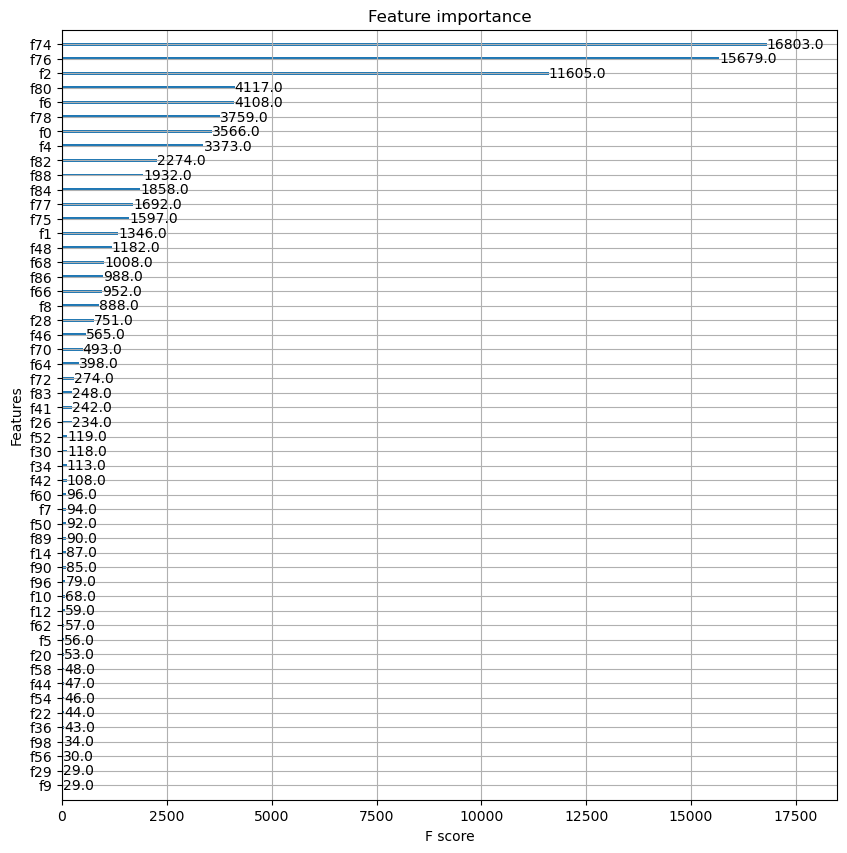

In [62]:
feature_importances(xgb4_ind, 52)

&nbsp;

__Valence__

In [63]:
np.random.seed(1909)
xgb3_val.fit(X_subset_03_val,y_subset_03_val)
pred_val3 = xgb3_val.predict(X_test_val)

In [64]:
plot(y_test_val, pred_val3)

,Predicted 0,Predicted 1,Predicted 2,Predicted 3,Predicted 4,Predicted 5,Predicted 6,Predicted 7,Predicted 8,Predicted 9,Predicted 10,Predicted 11
Actual 0,485,55,110,3,15,64,7,0,35,7,0,0
Actual 1,181,46,34,1,13,30,0,0,22,0,0,0
Actual 2,221,32,56,0,10,24,1,0,33,2,0,0
Actual 3,152,12,37,0,11,20,0,0,25,2,1,0
Actual 4,184,9,30,3,27,28,0,0,19,1,0,0
Actual 5,296,30,110,2,21,79,2,0,37,5,0,0
Actual 6,125,13,30,2,3,36,1,1,7,1,0,0
Actual 7,92,7,19,0,5,7,1,0,9,0,0,0
Actual 8,271,9,47,10,22,76,2,1,40,9,0,0
Actual 9,96,7,29,2,8,24,0,0,6,0,0,0


In [65]:
print(classification_report(y_test_val, pred_val3, zero_division=1))

              precision    recall  f1-score   support

           0       0.23      0.62      0.33       781
           1       0.20      0.14      0.17       327
           2       0.11      0.15      0.13       379
           3       0.00      0.00      0.00       260
           4       0.20      0.09      0.12       301
           5       0.20      0.14      0.16       582
           6       0.07      0.00      0.01       219
           7       0.00      0.00      0.00       140
           8       0.17      0.08      0.11       487
           9       0.00      0.00      0.00       172
          10       0.00      0.00      0.00        56
          11       1.00      0.00      0.00        13

    accuracy                           0.20      3717
   macro avg       0.18      0.10      0.09      3717
weighted avg       0.15      0.20      0.15      3717



<Figure size 1800x1800 with 0 Axes>

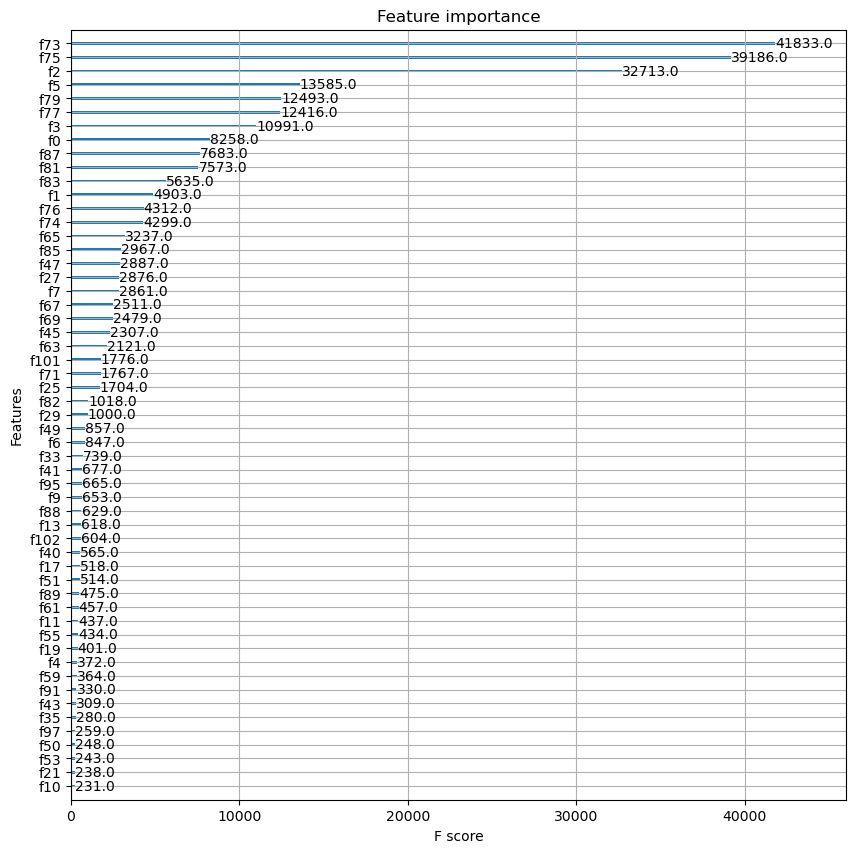

In [66]:
feature_importances(xgb3_val, 55)

&nbsp;

&nbsp;

### Datapoints excluding "I prefer not to say", "I don't know" & NaN answers:

__Individual__

In [67]:
np.random.seed(1908)
xgb4_ind.fit(X_subset_3_ind,y_subset_3_ind)
pred_ind4 = xgb4_ind.predict(X_test_ind)

In [68]:
plot(y_test_ind, pred_ind4)

,Predicted 0,Predicted 1,Predicted 2,Predicted 3,Predicted 4,Predicted 5,Predicted 6,Predicted 7,Predicted 8,Predicted 9,Predicted 10,Predicted 11
Actual 0,328,36,79,34,72,194,5,0,20,5,6,2
Actual 1,93,26,34,29,51,74,3,0,12,3,2,0
Actual 2,123,20,34,31,55,85,7,0,18,4,2,0
Actual 3,65,15,17,23,62,64,0,0,12,1,1,0
Actual 4,101,11,14,17,77,53,2,0,24,2,0,0
Actual 5,210,34,49,30,60,165,2,0,18,8,6,0
Actual 6,70,11,21,14,35,59,0,0,4,0,5,0
Actual 7,52,10,9,9,20,33,2,1,3,1,0,0
Actual 8,190,17,26,19,75,118,2,0,33,1,6,0
Actual 9,57,9,14,8,23,48,0,0,10,1,1,1


In [69]:
print(classification_report(y_test_ind, pred_ind4, zero_division=1))

              precision    recall  f1-score   support

           0       0.25      0.42      0.31       781
           1       0.14      0.08      0.10       327
           2       0.11      0.09      0.10       379
           3       0.11      0.09      0.10       260
           4       0.14      0.26      0.18       301
           5       0.18      0.28      0.22       582
           6       0.00      0.00      0.00       219
           7       1.00      0.01      0.01       140
           8       0.21      0.07      0.10       487
           9       0.04      0.01      0.01       172
          10       0.00      0.00      0.00        56
          11       0.00      0.00      0.00        13

    accuracy                           0.19      3717
   macro avg       0.18      0.11      0.10      3717
weighted avg       0.19      0.19      0.16      3717



<Figure size 1800x1800 with 0 Axes>

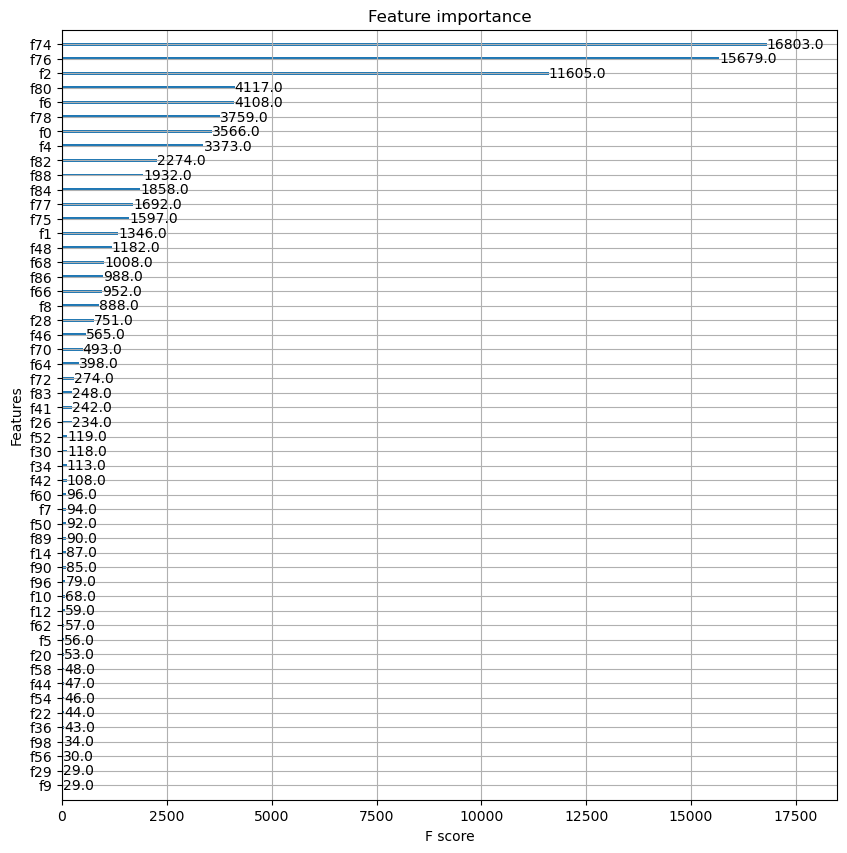

In [70]:
feature_importances(xgb4_ind, 52)

&nbsp;

__Valence__

In [71]:
np.random.seed(1909)
xgb3_val.fit(X_subset_3_val,y_subset_3_val)
pred_val4 = xgb3_val.predict(X_test_val)

In [72]:
plot(y_test_val, pred_val4)

,Predicted 0,Predicted 1,Predicted 2,Predicted 3,Predicted 4,Predicted 5,Predicted 6,Predicted 7,Predicted 8,Predicted 9,Predicted 10,Predicted 11
Actual 0,485,55,110,3,15,64,7,0,35,7,0,0
Actual 1,181,46,34,1,13,30,0,0,22,0,0,0
Actual 2,221,32,56,0,10,24,1,0,33,2,0,0
Actual 3,152,12,37,0,11,20,0,0,25,2,1,0
Actual 4,184,9,30,3,27,28,0,0,19,1,0,0
Actual 5,296,30,110,2,21,79,2,0,37,5,0,0
Actual 6,125,13,30,2,3,36,1,1,7,1,0,0
Actual 7,92,7,19,0,5,7,1,0,9,0,0,0
Actual 8,271,9,47,10,22,76,2,1,40,9,0,0
Actual 9,96,7,29,2,8,24,0,0,6,0,0,0


In [73]:
print(classification_report(y_test_val, pred_val4, zero_division=1))

              precision    recall  f1-score   support

           0       0.23      0.62      0.33       781
           1       0.20      0.14      0.17       327
           2       0.11      0.15      0.13       379
           3       0.00      0.00      0.00       260
           4       0.20      0.09      0.12       301
           5       0.20      0.14      0.16       582
           6       0.07      0.00      0.01       219
           7       0.00      0.00      0.00       140
           8       0.17      0.08      0.11       487
           9       0.00      0.00      0.00       172
          10       0.00      0.00      0.00        56
          11       1.00      0.00      0.00        13

    accuracy                           0.20      3717
   macro avg       0.18      0.10      0.09      3717
weighted avg       0.15      0.20      0.15      3717



<Figure size 1800x1800 with 0 Axes>

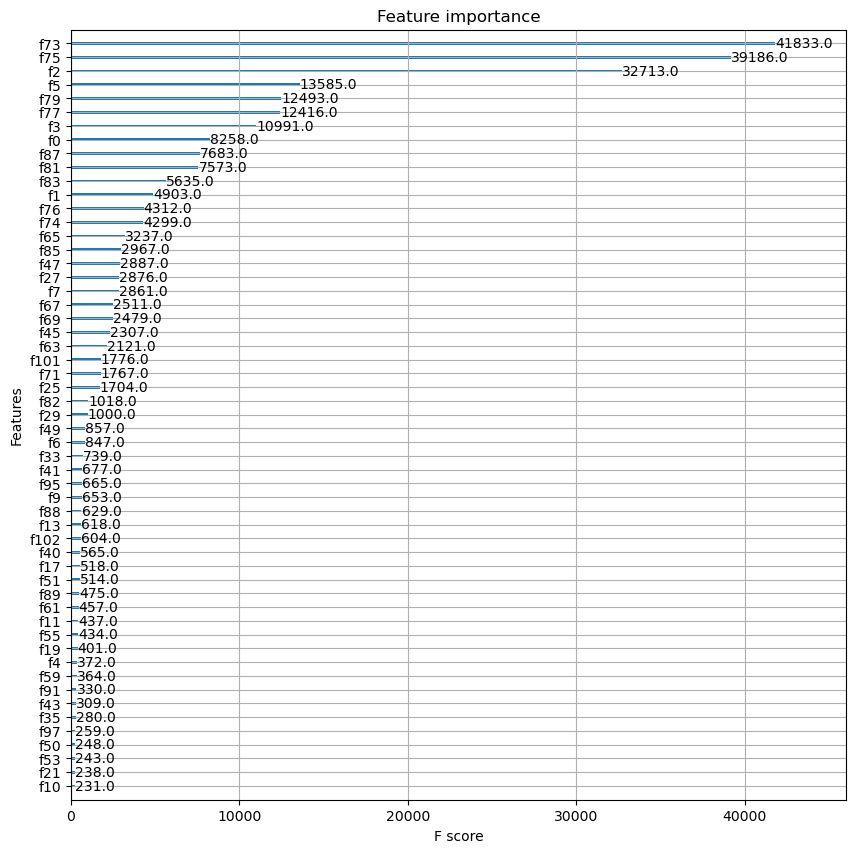

In [74]:
feature_importances(xgb3_val, 55)